In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LeakyReLU, ELU
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#Načítanie datasetu
df = pd.read_excel("/content/drive/MyDrive/dataset.xlsx")

# Premiešanie riadkov v DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = df.iloc[:, :25].values
y = df['Rozsev 0-5'].values

#Normalizácia dát pomocou MinMax
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#Rozdelenie dát
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
#Formátovanie vstupu
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



# Definovanie CNN modelu
model = Sequential([
    Conv1D(128, kernel_size=3, activation=LeakyReLU(alpha=0.1), input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation=LeakyReLU(alpha=0.1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation=LeakyReLU(alpha=0.1)),
    Dropout(0.5),
    Dense(64, activation=LeakyReLU(alpha=0.1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

#Trénovanie
history = model.fit(X_train, y_train, epochs=80, batch_size=100, validation_data=(X_val, y_val))

#Vyhodnotenie modelu
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/80
3/3 [==============================] - 2s 164ms/step - loss: 10.1826 - val_loss: 9.1882
Epoch 2/80
3/3 [==============================] - 0s 39ms/step - loss: 9.7821 - val_loss: 8.5652
Epoch 3/80
3/3 [==============================] - 0s 53ms/step - loss: 9.0023 - val_loss: 7.3879
Epoch 4/80
3/3 [==============================] - 0s 38ms/step - loss: 7.5691 - val_loss: 5.2659
Epoch 5/80
3/3 [==============================] - 0s 45ms/step - loss: 5.0119 - val_loss: 2.6374
Epoch 6/80
3/3 [==============================] - 0s 40ms/step - loss: 3.0318 - val_loss: 4.2951
Epoch 7/80
3/3 [==============================] - 0s 47ms/step - loss: 4.2777 - val_loss: 4.1744
Epoch 8/80
3/3 [==============================] - 0s 40ms/step - loss: 3.6312 - val_loss: 2.6871
Epoch 9/80
3/3 [==============================] - 0s 48ms/step - loss: 2.9493 - val_loss: 2.6586
Epoch 10/80
3/3 [==============================] - 0s 44ms/step - loss: 3.2551 - val_loss: 2.8222
Epoch 11/80
3/3 [==========

In [ ]:
# Predikcia na testovacej sade
predicted_values = model.predict(X_test)

# Vypísanie predikovaných a skutočných hodnôt
for i in range(len(predicted_values)):
    print("Predikovaná hodnota:", predicted_values[i][0], "| Skutočná hodnota:", y_test[i])


4/4 [==============================] - 0s 3ms/step
Predikovaná hodnota: 9.453613 | Skutočná hodnota: 6.67
Predikovaná hodnota: 9.547482 | Skutočná hodnota: 11.21
Predikovaná hodnota: 9.508732 | Skutočná hodnota: 10.55
Predikovaná hodnota: 10.592707 | Skutočná hodnota: 7.96
Predikovaná hodnota: 9.658062 | Skutočná hodnota: 11.4
Predikovaná hodnota: 9.709485 | Skutočná hodnota: 9.57
Predikovaná hodnota: 9.8268585 | Skutočná hodnota: 11.03
Predikovaná hodnota: 9.860792 | Skutočná hodnota: 9.62
Predikovaná hodnota: 9.808362 | Skutočná hodnota: 9.27
Predikovaná hodnota: 9.426015 | Skutočná hodnota: 9.49
Predikovaná hodnota: 10.206756 | Skutočná hodnota: 7.47
Predikovaná hodnota: 9.849133 | Skutočná hodnota: 17.85
Predikovaná hodnota: 9.3702755 | Skutočná hodnota: 7.86
Predikovaná hodnota: 9.371672 | Skutočná hodnota: 3.05
Predikovaná hodnota: 10.113701 | Skutočná hodnota: 7.24
Predikovaná hodnota: 9.28162 | Skutočná hodnota: 24.44
Predikovaná hodnota: 9.808202 | Skutočná hodnota: 6.37
Predi

4/4 [==============================] - 0s 4ms/step


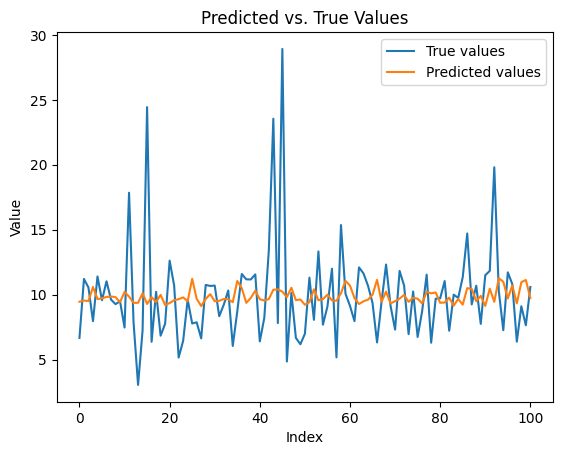

In [ ]:
# Predikcia hodnôt pre testovaciu sadu
predicted_values = model.predict(X_test)

# Vykreslenie grafu predikovaných a skutočných hodnôt
plt.plot(y_test, label="True values")
plt.plot(predicted_values, label="Predicted values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Predicted vs. True Values")
plt.legend()
plt.show()

Test Loss: 2.528594970703125


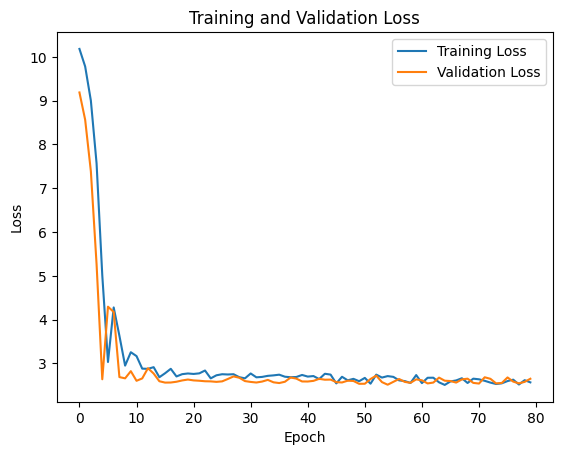

In [ ]:
print("Test Loss:", loss)

#Zobrazenie v grafe
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()